In [1]:
from pydicom import dcmread
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

img_dir = "Dataset/Images"
seg_dir = "Dataset/Segmentations"

case_11_img_files = [
    os.listdir(os.path.join(img_dir, f))
    for f in os.listdir(img_dir)
    if f.startswith("Case_011")
]
case_11_seg_files = [
    os.path.join(seg_dir, f) for f in os.listdir(seg_dir) if f.startswith("Case_011")
]

case_1_img_files = [
    os.listdir(os.path.join(img_dir, f))
    for f in os.listdir(img_dir)
    if f.startswith("Case_001")
]
case_1_seg_files = [
    os.path.join(seg_dir, f) for f in os.listdir(seg_dir) if f.startswith("Case_001")
]

case_11_img_files.sort()
case_11_seg_files.sort()

case_1_img_files.sort()
case_1_seg_files.sort()

print("Case 11")
print(case_11_img_files)
print(case_11_seg_files)

Case 11
[['1-81.dcm', '1-95.dcm', '1-42.dcm', '1-56.dcm', '1-57.dcm', '1-43.dcm', '1-94.dcm', '1-80.dcm', '1-96.dcm', '1-82.dcm', '1-55.dcm', '1-41.dcm', '1-69.dcm', '1-68.dcm', '1-40.dcm', '1-54.dcm', '1-83.dcm', '1-97.dcm', '1-93.dcm', '1-87.dcm', '1-78.dcm', '1-50.dcm', '1-44.dcm', '1-45.dcm', '1-51.dcm', '1-79.dcm', '1-86.dcm', '1-92.dcm', '1-84.dcm', '1-90.dcm', '1-47.dcm', '1-53.dcm', '1-52.dcm', '1-46.dcm', '1-91.dcm', '1-85.dcm', '1-21.dcm', '1-35.dcm', '1-138.dcm', '1-104.dcm', '1-110.dcm', '1-111.dcm', '1-105.dcm', '1-34.dcm', '1-20.dcm', '1-36.dcm', '1-22.dcm', '1-9.dcm', '1-113.dcm', '1-107.dcm', '1-106.dcm', '1-112.dcm', '1-8.dcm', '1-23.dcm', '1-37.dcm', '1-33.dcm', '1-27.dcm', '1-116.dcm', '1-102.dcm', '1-103.dcm', '1-117.dcm', '1-26.dcm', '1-32.dcm', '1-18.dcm', '1-24.dcm', '1-30.dcm', '1-101.dcm', '1-115.dcm', '1-129.dcm', '1-128.dcm', '1-114.dcm', '1-100.dcm', '1-31.dcm', '1-25.dcm', '1-19.dcm', '1-14.dcm', '1-28.dcm', '1-3.dcm', '1-119.dcm', '1-125.dcm', '1-131.dcm',

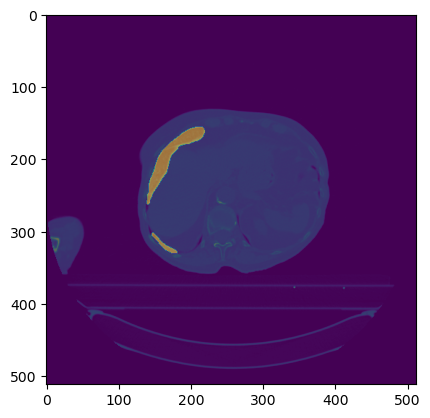

In [2]:
from src.utils import dicom_dir_to_3d_arr
import matplotlib.pyplot as plt

img_dir = "Dataset/Images/Case_011"
mask = np.load("Dataset/Segmentations/Case_011_seg.npz")["masks"]

arr = dicom_dir_to_3d_arr(img_dir)

plt.imshow(arr[30])
plt.imshow(mask[30], alpha=0.5)

plt.show()

In [8]:
# load the data for each case
from src.utils import dicom_dir_to_3d_arr
from src.utils import load_npz

img_dir = "/Users/vishaljain/mphil_medical_imaging_cw/Dataset/Images"
mask_dir = "/Users/vishaljain/mphil_medical_imaging_cw/Dataset/Segmentations"

all_slices_img_mask_case_dict = []

for case_name in os.listdir(img_dir):
    case_fpath = os.path.join(img_dir, case_name)
    mask_fpath = os.path.join(mask_dir, case_name + "_seg.npz")

    case_arr = dicom_dir_to_3d_arr(case_fpath)
    mask_arr = load_npz(mask_fpath)

    for slice in range(case_arr.shape[0]):
        case_tuple = (f"{case_name}_{slice}", case_arr[slice], mask_arr[slice])
        all_slices_img_mask_case_dict.append(case_tuple)

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    all_slices_img_mask_case_dict, test_size=0.33, random_state=42
)

In [10]:
from icecream import ic

ic(len(train))
ic(len(test))
ic(len(all_slices_img_mask_case_dict))

ic| len(train): 1011
ic| len(test): 674
ic| len(all_slices_img_mask_case_dict): 1685


1685